<a href="https://colab.research.google.com/github/cartmarsh/MachineLearning1/blob/main/RNN_Toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [1]:
import os

In [4]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [5]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

100% 52.6M/52.6M [00:03<00:00, 23.7MB/s]
100% 52.6M/52.6M [00:03<00:00, 15.5MB/s]


In [6]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [7]:
import pandas as pd

In [8]:
raw_df = pd.read_csv("data/train.csv.zip")
test_df = pd.read_csv("data/test.csv.zip")
sub_df = pd.read_csv("data/sample_submission.csv.zip")

In [9]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [11]:
raw_df.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
108330,432527d668377a39,Re Hinduism and Science \n\nIts hard to see h...,0,0,0,0,0,0
95151,fe5f5a85def39822,An editor has asked for a deletion review of F...,0,0,0,0,0,0
93609,fa4d4b540bb5003a,What a surprise a yank sides with a yank and c...,0,0,0,0,0,0
66821,b2d12cd5c3f89e1e,Calcutta -> Kolkata name change\n\nHi there. I...,0,0,0,0,0,0
132951,c742385748808c3a,That's a very fair question. The answer is tha...,0,0,0,0,0,0
113376,5e4c72093b775cba,"""\nNot sure why you find it acceptable or desi...",0,0,0,0,0,0
32839,5762866f8a31f3d3,"What? \n\nCan you be more specific, wiki-stalk...",0,0,0,0,0,0
131905,c1d225da521e92be,Vandalism? Don't use words which you do not un...,0,0,0,0,0,0
51231,8914267750272df6,"""\n\nPlease refrain from adding nonsense to Wi...",0,0,0,0,0,0
94498,fcac4111f9b0fa83,"You know, this is in a book. Bridges, by Cass ...",0,0,0,0,0,0


In [12]:
target_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [13]:
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [14]:
for col in target_cols:
  print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [15]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [16]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [17]:
from torchtext.data.utils import get_tokenizer

In [18]:
tokenizer = get_tokenizer("basic_english")

In [19]:
sample_comment = raw_df.comment_text.values[0]

In [20]:
sample_comment_tokens = tokenizer(sample_comment)

In [21]:
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [22]:
from torchtext.vocab import build_vocab_from_iterator

In [23]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [24]:
VOCAB_SIZE = 1500

In [25]:
## for words that are unknown to the vocab
unk_token = "<unk>"

## to pad sentences, because we need the same length for RNNs
pad_token = "<pad>"

In [26]:
vocab = build_vocab_from_iterator(comment_tokens, specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [27]:
vocab.set_default_index(vocab[unk_token])

In [28]:
vocab["is"]

12

In [29]:
## vocab.lookup_indices(sample_comment_tokens)


### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

In [30]:
MAX_LENGTH = 150

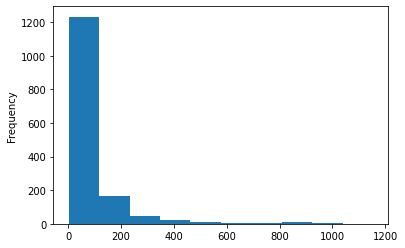

In [31]:
raw_df.comment_text.sample(1500).map(tokenizer).map(len).plot(kind="hist")

In [32]:
from torch.utils.data  import Dataset

In [33]:
def pad_tokens(tokens):
  if(len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token] *( MAX_LENGTH - len(tokens))

In [34]:
import torch

In [35]:
class JigsawDataset(Dataset):
  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test
    
  
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    comment_tokens = pad_tokens(tokenizer(comment_text))
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0]).float()
    else:
      target = torch.tensor(self.df[target_cols].values[index]).float()
    return input, target

  def __len__(self):
    return len(self.df)

In [36]:
raw_ds = JigsawDataset(raw_df)

In [37]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [38]:
from torch.utils.data import random_split

In [39]:
VAL_FRAC = 0.25

In [40]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [41]:
len(train_ds)

119679

In [42]:
test_ds = JigsawDataset(test_df, is_test=True)

In [43]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [44]:
from torch.utils.data import DataLoader

In [89]:
BATCH_SIZE = 64

In [90]:
train_dl = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=2, pin_memory=True)

## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [101]:
import torch.nn as nn
import torch.functional as F

In [102]:
vocab[pad_token]

1

In [103]:
emb = nn.Embedding(VOCAB_SIZE, 256, 1)

In [104]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [105]:
!pip install pytorch_lightning --quiet

In [106]:
import pytorch_lightning as pl

In [107]:
import torch.nn.functional as F

In [108]:
import numpy as np

In [109]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
      super().__init__()
      self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
      self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
      self.linear = nn.Linear(128, 6)
      self.learning_rate = 0.001

    def forward(self, x):
      out = self.emb(x)
      out, hn = self.lstm(out)
      out = F.relu(out[:, -1,:])
      out = self.linear(out)
      return out
    def training_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss

    def validation_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss.item()

    def validation_epoch_end(self, validation_step_outputs):

      loss = np.mean(validation_step_outputs)
      print("Epoch #{}; Loss: {:4f}".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      return probs

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=self.learning_rate)


In [110]:
class JigsawModel2(pl.LightningModule):
    def __init__(self):
      super().__init__()
      self.emb = nn.Embedding(VOCAB_SIZE, 512, 1)
      self.lstm = nn.LSTM(512, 128, 1, batch_first=True)
      self.linear = nn.Linear(128, 6)
      self.learning_rate = 0.001

    def forward(self, x):
      out = self.emb(x)
      out, hn = self.lstm(out)
      out = F.relu(out[:, -1,:])
      out = self.linear(out)
      return out
    def training_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss

    def validation_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss.item()

    def validation_epoch_end(self, validation_step_outputs):

      loss = np.mean(validation_step_outputs)
      print("Epoch #{}; Loss: {:4f}".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      return probs

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [111]:
model = JigsawModel()

In [112]:
#model2 = JigsawModel2()

## Train and Evaluate the Model

In [113]:
trainer = pl.Trainer(max_epochs=4, accelerator="gpu", auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [114]:
#trainer2 = pl.Trainer(max_epochs=3, accelerator="gpu", auto_lr_find=True)

In [115]:
trainer.tune(model, train_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.005754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_e4670f80-b28f-4454-b20a-35e006518499.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_e4670f80-b28f-4454-b20a-35e006518499.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f3b55d36b80>}

In [116]:
#trainer2.tune(model2, train_dl)

In [117]:
print(model.learning_rate)
#print(model2.learning_rate)

0.005754399373371567


In [118]:
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.681554


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.063001


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.064683


Validation: 0it [00:00, ?it/s]

Epoch #2; Loss: 0.061019


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch #3; Loss: 0.061648


In [86]:
#trainer2.fit(model2, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 768 K 
1 | lstm   | LSTM      | 328 K 
2 | linear | Linear    | 774   
-------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.390     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.685780


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.074438


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.075368


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.068136


## Make Predictions & Submit

In [119]:
test_preds = trainer.predict(model, test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1870it [00:00, ?it/s]

In [120]:
#test_preds2 = trainer2.predict(model2, test_dl)

In [121]:
test_preds = torch.cat(test_preds)

In [122]:
test_preds.shape

torch.Size([153164, 6])

In [123]:
test_probs = torch.sigmoid(test_preds)

In [124]:
#test_probs2 = torch.sigmoid(test_preds2)

In [125]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [126]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.728359,0.580604,0.718271,0.504772,0.702061,0.563885
1,0000247867823ef7,0.501090,0.500008,0.500303,0.500011,0.500578,0.500054
2,00013b17ad220c46,0.503796,0.500020,0.501601,0.500031,0.501493,0.500140
3,00017563c3f7919a,0.501531,0.500006,0.500239,0.500007,0.500550,0.500042
4,00017695ad8997eb,0.502003,0.500006,0.500311,0.500006,0.500549,0.500034
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.501622,0.500004,0.500299,0.500004,0.500469,0.500034
153160,fffd7a9a6eb32c16,0.552282,0.500356,0.506722,0.500382,0.513290,0.500724
153161,fffda9e8d6fafa9e,0.501407,0.500006,0.500229,0.500005,0.500660,0.500017
153162,fffe8f1340a79fc2,0.501701,0.500004,0.500390,0.500001,0.500448,0.500018


In [127]:
sub_df.to_csv("submisson4.csv", index=None)

In [68]:
sample_df = raw_df.sample(30)

In [69]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
105420,340245f9750712dc,"""\n\nThe Indie (music) article isn't about a g...",0,0,0,0,0,0
132185,c35cf7c167d34107,Nobody is saying the article is perfect. I kno...,0,0,0,0,0,0
109694,4ac01dd3853ca9d3,"""\n\nWhy Wikipedia Can't Work\nWikipedia claim...",0,0,0,0,0,0
30075,4fd92cb99383bc97,"""\nI believe HC is a talented writer and artis...",0,0,0,0,0,0
121768,8b7a21a7974872f5,"Indeed it does, well spotted. It seems that si...",0,0,0,0,0,0
110271,4de89d58ab4f62e2,Tie break?\n\nThere are no less than four sets...,0,0,0,0,0,0
135346,d3db24ab3b8d1d4f,Last bullet point\nThe third bullet point:\n e...,0,0,0,0,0,0
109269,4861263ba70f9715,See also Kevin Rose's twitter. '''''',0,0,0,0,0,0
3591,09a1142b4cb5f5ad,Welcome to the site of chimpo14 you are allowe...,0,0,0,0,0,0
61420,a466d0a5ea2b9028,Copy vio\n\nI found an offsite source for that...,0,0,0,0,0,0


In [70]:
print(type(sample_df))
print(sample_df.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 105420 to 38367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30 non-null     object
 1   comment_text   30 non-null     object
 2   toxic          30 non-null     int64 
 3   severe_toxic   30 non-null     int64 
 4   obscene        30 non-null     int64 
 5   threat         30 non-null     int64 
 6   insult         30 non-null     int64 
 7   identity_hate  30 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.1+ KB
None


In [71]:
sample_ds = JigsawDataset(sample_df)

In [72]:
sample_dl = DataLoader(sample_ds, batch_size=30)

In [73]:
sample_preds = trainer.predict(model, sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [74]:
print(sample_probs)

NameError: ignored

In [ ]:
sample_probs = torch.sigmoid(sample_preds[0])


In [ ]:
(sample_probs > 0.55).int()

In [ ]:
sample_df

# Get tweets from twitter

## Transform data
## make predictions

In [ ]:
!pip install tweepy==4.1.0
!pip install python-dotenv
!pip install textblob
!pip install wordcloud
!pip install better_profanity
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity




In [ ]:
consumer_key = 'EaPXlI8mJH7ZRGWwajcI0bMtu'
consumer_secret = 'MnLvrs6HxDRHB2MGYlnlrlbufl1eoZgqieYGE9Hbg1ipw4dV0I' 
access_token = '840693273345822720-wmQuqwFOvu6iWIHn33D1podAIzL1ZeV'
access_token_secret = 'hy7u64l95h5Fog2GoRpQzFURwgS0hMWdWfnGCjFlmMyOK'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

print(tweepy.__version__)


In [ ]:
# configurations

num_tweets = 1000

In [ ]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(num_tweets)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [ ]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [ ]:
tweet_list[:10]

['@TheDevilsConfes @RitchieTorres @Meidas_LaurenA I prefer Nancy Pelosi as speaker! I hate Republicans! Lets not forg… https://t.co/M6SEoqM642',
 '@TomFitton Trump is a #Traitor and #TraitorsSupportTraitorTrump',
 "Congressional panel votes to release Trump's tax returns to public - Los Angeles Times https://t.co/d4eFbjx5p0",
 '@DavidCornDC So, who prepared his tax returns? Allen Weisselberg, or another Trump Corporation flunky?',
 'Live Updates: I.R.S. Didn’t Audit Trump for 2 Years in Office, House Committee Says https://t.co/7vvgNxEfeq',
 '@1MurderFancier @1776Neville @Fortunateone19 @GOP @RepAdamSchiff No ad hominem used. Trump cultists exist.',
 '@robreiner With all the destruction Biden is doing to this country and all you care about is Trump.  What a loser.',
 '@gavinbena I\'ve said for years - if Trump had done a "COVID is bad, buy this Trump 2020 mask for $20.20" he would h… https://t.co/9jcrTJVYwS',
 'Ain’t that the truth! #Trump #TrumpBorderWall https://t.co/KblK7xt47G',
 "T

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
", ".join(english_stopwords)[:30]

In [ ]:
def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = english_stopwords
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned[:10]

['i prefer nancy pelosi as speaker i hate republicans lets not forg',
 'trump is',
 'congressional panel votes release trumps tax returns public los angeles times',
 'so who prepared his tax returns allen weisselberg or another trump corporation flunky',
 'live updates i r s didn t audit trump 2 years office house committee says',
 'no ad hominem used trump cultists exist',
 'with all destruction biden is doing this country all you care about is trump what loser',
 'ive said years if trump had done covid is bad buy this trump 2020 mask 20 20 he would h',
 'ain t that truth',
 'ted cruz was biggest trump up what insults he threw at him he just took it trump called cruzs wife ug']

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tweets_df = np.array(cleaned)

In [ ]:
tweets_df.shape

(1000,)

In [ ]:
tweets_df[:10]

array(['i prefer nancy pelosi as speaker i hate republicans lets not forg',
       'trump is',
       'congressional panel votes release trumps tax returns public los angeles times',
       'so who prepared his tax returns allen weisselberg or another trump corporation flunky',
       'live updates i r s didn t audit trump 2 years office house committee says',
       'no ad hominem used trump cultists exist',
       'with all destruction biden is doing this country all you care about is trump what loser',
       'ive said years if trump had done covid is bad buy this trump 2020 mask 20 20 he would h',
       'ain t that truth',
       'ted cruz was biggest trump up what insults he threw at him he just took it trump called cruzs wife ug'],
      dtype='<U118')

In [ ]:
column_values= ["comment_text"]

In [ ]:
tweets_df = pd.DataFrame(data=tweets_df, columns=column_values )

In [ ]:
len(tweets_df)

1000

In [ ]:
tweets_df.head

<bound method NDFrame.head of                                           comment_text
0    i prefer nancy pelosi as speaker i hate republ...
1                                             trump is
2    congressional panel votes release trumps tax r...
3    so who prepared his tax returns allen weisselb...
4    live updates i r s didn t audit trump 2 years ...
..                                                 ...
995  these are facts my man i dont support trump ei...
996  desantis as vp along side trump will crush opp...
997  ginni isn t government this was about those go...
998  hahahahaha democrats need become more fiscally...
999  its weird there wasnt border crisis under trum...

[1000 rows x 1 columns]>

In [ ]:
jig_tweets = JigsawDataset(tweets_df, is_test=True)

In [ ]:
jig_tweets

In [ ]:
jig_tweets_dl = DataLoader(jig_tweets, batch_size=num_tweets)

In [ ]:
jig_tweets_preds = trainer.predict(model, jig_tweets_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [ ]:
jig_tweets_probs = torch.sigmoid(jig_tweets_preds[0])

In [ ]:
print( len(jig_tweets_probs))

1000


In [ ]:
jig_tweets_probs[:10]

tensor([[0.5446, 0.5003, 0.5096, 0.5003, 0.5071, 0.5015],
        [0.5071, 0.5000, 0.5009, 0.5001, 0.5014, 0.5003],
        [0.5106, 0.5001, 0.5015, 0.5002, 0.5022, 0.5004],
        [0.5938, 0.5011, 0.5286, 0.5009, 0.5216, 0.5030],
        [0.5187, 0.5002, 0.5042, 0.5004, 0.5039, 0.5005],
        [0.5450, 0.5005, 0.5147, 0.5005, 0.5095, 0.5014],
        [0.7069, 0.5184, 0.6269, 0.5085, 0.6149, 0.5143],
        [0.5060, 0.5000, 0.5006, 0.5001, 0.5013, 0.5004],
        [0.5454, 0.5003, 0.5067, 0.5006, 0.5092, 0.5015],
        [0.5136, 0.5001, 0.5017, 0.5001, 0.5022, 0.5005]])

In [ ]:
jig_tweets_int = (jig_tweets_probs > 0.60).int()

In [ ]:
jig_tweets_int_lowprobs = (jig_tweets_probs < 0.51).int()

In [ ]:
len(jig_tweets_int_lowprobs)

1000

In [ ]:
print( len(jig_tweets_int))

1000


In [ ]:
print(jig_tweets_int_lowprobs[:20])

tensor([[0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1]], dtype=torch.int32)


In [ ]:
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
tweets_df[target_cols] = jig_tweets_int.detach().cpu().numpy()

In [ ]:
len(jig_tweets_int.detach().cpu().numpy())

1000

In [ ]:
tweets_df["comment_text"][0] 

'i prefer nancy pelosi as speaker i hate republicans lets not forg'

In [ ]:
tweets_df.info

<bound method DataFrame.info of                                           comment_text  toxic  severe_toxic  \
0    i prefer nancy pelosi as speaker i hate republ...      0             0   
1                                             trump is      0             0   
2    congressional panel votes release trumps tax r...      0             0   
3    so who prepared his tax returns allen weisselb...      0             0   
4    live updates i r s didn t audit trump 2 years ...      0             0   
..                                                 ...    ...           ...   
995  these are facts my man i dont support trump ei...      0             0   
996  desantis as vp along side trump will crush opp...      0             0   
997  ginni isn t government this was about those go...      0             0   
998  hahahahaha democrats need become more fiscally...      0             0   
999  its weird there wasnt border crisis under trum...      0             0   

     obscene  threa

In [ ]:
non_zero_tweets = tweets_df[target_cols] > 0

In [ ]:
non_zero_tweets

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [ ]:
type(tweets_df)

pandas.core.frame.DataFrame

In [ ]:
# all toxic statements

all_toxic = []
all_threat = []
all_insult = []
all_identity_hate = []

for index, row in tweets_df.iterrows():
    
    if row.toxic == 1:
      all_toxic.append(tweet_list[index])
      
    if row.threat == 1:
      all_threat.append(tweet_list[index])
      
    if row.insult == 1:
      all_insult.append(tweet_list[index])
      
    if row.identity_hate == 1:
      all_identity_hate.append(tweet_list[index])
      

In [ ]:
# all statements that are close to 0.5 for every value


all_good = []


for idx, row in enumerate(jig_tweets_int_lowprobs):
  print(row)
  if row[0] == 1 and row[1] == 1 and row[2] == 1 and row[3] == 1 and row[4] == 1 and row[5] == 1:
    all_good.append(tweet_list[idx])


tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 0, 1, 0, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 0, 1, 1, 1], dtype=torch.int32)
tensor([0, 0, 0, 1, 0, 0], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 0, 0, 1, 0, 0], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0, 1, 0, 1, 0, 1], dtype=torch.int32)
tensor([0, 1, 1, 1, 1, 1], dtype=t

In [ ]:
all_toxic

['@robreiner With all the destruction Biden is doing to this country and all you care about is Trump.  What a loser.',
 '@west_whitaker @elonmusk Why don’t you get off Twitter?? He’s the owner and you’re a nobody! Doesn’t really matter… https://t.co/tWFGXYDUhV',
 "@KariLake Seriously.... Does your jaw ever cramp from having Trump's nut in your mouth??",
 '@WallaceVon1 @CNN Are you suggesting the head of the fbi wasn’t a trump nominee? This is not a story no matter how much you need it to be.',
 '@ForgiatoBlow47 Full of nothing but HATE, HATE for AMERICA, &amp; HATE for TRUMP,',
 '@Bitboy_Crypto You are a Trumpee,not a patriot. A follower of Trump. A true American wants the US to succeed,not separate.',
 '@bigjimtoo @CanadianIIS @Andi1381338 @TheLandsNotOurs @TackettWendi @FLYNN6411 @LacarpetronM @pcalchronicles1… https://t.co/yx0cI9HKas',
 'How do you describe yourself on twitter and WHY? By your sexual preference? career? Family? Political leaning? Mari… https://t.co/b8v1PADCZF',
 '@C

In [ ]:
all_threat

[]

In [ ]:
all_insult

['@robreiner With all the destruction Biden is doing to this country and all you care about is Trump.  What a loser.',
 '@west_whitaker @elonmusk Why don’t you get off Twitter?? He’s the owner and you’re a nobody! Doesn’t really matter… https://t.co/tWFGXYDUhV',
 '@ForgiatoBlow47 Full of nothing but HATE, HATE for AMERICA, &amp; HATE for TRUMP,',
 '@Anesthesia78611 @Danny99634068 @hlpethiopia @greg_price11 You progressives woulda been way better off with 4 more… https://t.co/k1xnuR4KJ9',
 '@slayer_agolf @madison_father @ksorbs @elonmusk Trump lives in your bio and in your head  rent. Free.',
 '@Jim_Jordan you pledge allegiance to Trump and Putin for the fucked up things they have against you while the rest… https://t.co/vOUTnk88xP',
 '@EmJHarris2 @JackPosobiec Trump’s candidacy is struggling to get off the ground. His schtick doesn’t sell as well w… https://t.co/CTmW3mtBDS',
 '@robreiner You are such a silly 🤡!  You ignore the massive corruption by Biden, Hunter, Clinton’s and Obama’s 

In [ ]:
all_identity_hate

[]

In [ ]:
all_good

['@TomFitton Trump is a #Traitor and #TraitorsSupportTraitorTrump',
 '@gavinbena I\'ve said for years - if Trump had done a "COVID is bad, buy this Trump 2020 mask for $20.20" he would h… https://t.co/9jcrTJVYwS',
 '@JudiciaryGOP The GOP is worried about protecting trump and have no problem with Gym Jordan protecting and covering… https://t.co/dBS49GmxGR',
 '@KING5Seattle Read the comments…libs can’t face this and speak to the facts, the situation. All every one of them w… https://t.co/lZKaFCs8rg',
 '@TheWorldWatch $350,000 in the mid 80s is worth almost $1 million today. Makes the $130,000 Trump paid to Stormy a bargain',
 "@LemayTulsi When was the first time Democrats lied to our faces without apology?\nAdam Schiff-for-brains: he's seen… https://t.co/lZKpeotvBo",
 "@orbe01 @CollinRugg What have President Trump's got to do with the state of America now?  Violence, border flooding… https://t.co/L0WdaSRMlQ",
 '@aintscarylarry BREAKING NEWS: Donald Trump’s revealed tax returns show that 

In [ ]:
print("size toxic: ", len(all_toxic))

size toxic:  102


In [ ]:
# Data Analysis on these results
# metrics
  ## percentages of hate, toxic, etc. of the sample
  